# DATA

> The dataset was provided by the Mexican government [link](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients.

# Data Dictionary

In the Boolean features, 1 means "yes" and 2 means "no". Values as 97, 98 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Loading Modules

In [106]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Loading Dataset

In [6]:
# Read Covid Dataset
covid_csv = '../DATA/covid_data.csv'
covid = pd.read_csv(covid_csv)

# Explore Dataset

In [7]:
# Check Head
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
# Check Tail
covid.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [9]:
# Check Shape
covid.shape

(1048575, 21)

In [10]:
# Check Data Types
covid.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [11]:
# Check for Null Values
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [12]:
# Change Column Names to Lower Case
covid.columns = covid.columns.str.lower()

In [13]:
# Check Head again
covid.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [19]:
# Describe Age Column
round(covid['age'].describe())

count    1048575.0
mean          42.0
std           17.0
min            0.0
25%           30.0
50%           40.0
75%           53.0
max          121.0
Name: age, dtype: float64

In [24]:
# Check Value Counts for Pregnancy
covid['pregnant'].value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [29]:
# Check Pregnant Values Assigned to Men
covid[covid.sex == 2].pregnant.value_counts()

97    523511
Name: pregnant, dtype: int64

In [34]:
# Confirm That Missing Values (98) Are Asssigned to Females Only
covid[covid.pregnant == 98].sex.value_counts()

1    3754
Name: sex, dtype: int64

In [36]:
# Convert 97 to 2 as Men Can't Birth
covid.pregnant  = covid.pregnant.replace(97, 2)

In [38]:
# Check Value Counts for Pregnancy Again
covid['pregnant'].value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [42]:
# Check Value Counts for Intubed
covid['intubed'].value_counts(normalize = True)

97    0.809235
2     0.151682
1     0.032097
99    0.006986
Name: intubed, dtype: float64

In [44]:
# Drop Intubed Feature As It Has Too Many Null Values
covid.drop("intubed", axis = 1, inplace = True)

In [48]:
# Check Dataset Info
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   pneumonia             1048575 non-null  int64 
 6   age                   1048575 non-null  int64 
 7   pregnant              1048575 non-null  int64 
 8   diabetes              1048575 non-null  int64 
 9   copd                  1048575 non-null  int64 
 10  asthma                1048575 non-null  int64 
 11  inmsupr               1048575 non-null  int64 
 12  hipertension          1048575 non-null  int64 
 13  other_disease         1048575 non-null  int64 
 14  cardiovascular        1048575 non-null  int64 
 15

In [49]:
# Check Value Counts for Intubed
covid['icu'].value_counts(normalize = True)

97    0.809235
2     0.167546
1     0.016077
99    0.007141
Name: icu, dtype: float64

In [50]:
# Drop ICU Feature As It Has Too Many Null Values
covid.drop("icu", axis = 1, inplace = True)

In [51]:
# Check Dataset Info
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   pneumonia             1048575 non-null  int64 
 6   age                   1048575 non-null  int64 
 7   pregnant              1048575 non-null  int64 
 8   diabetes              1048575 non-null  int64 
 9   copd                  1048575 non-null  int64 
 10  asthma                1048575 non-null  int64 
 11  inmsupr               1048575 non-null  int64 
 12  hipertension          1048575 non-null  int64 
 13  other_disease         1048575 non-null  int64 
 14  cardiovascular        1048575 non-null  int64 
 15

In [54]:
# Check Value Counts for classification_final
covid['clasiffication_final'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: clasiffication_final, dtype: int64

In [55]:
# Amend Column Name As It Is Misspelled
covid.rename(columns = {'clasiffication_final':'classification_final'}, inplace = True)

In [57]:
# Check Dataset Info Again
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   pneumonia             1048575 non-null  int64 
 6   age                   1048575 non-null  int64 
 7   pregnant              1048575 non-null  int64 
 8   diabetes              1048575 non-null  int64 
 9   copd                  1048575 non-null  int64 
 10  asthma                1048575 non-null  int64 
 11  inmsupr               1048575 non-null  int64 
 12  hipertension          1048575 non-null  int64 
 13  other_disease         1048575 non-null  int64 
 14  cardiovascular        1048575 non-null  int64 
 15

In [58]:
# Convert Classification Values To 1 Or 2 (1 Meaning Positive For COVID, 2 Meaning Negative For COVID)
covid.classification_final = covid.classification_final.replace([1,2,3], 1)
covid.classification_final = covid.classification_final.replace([4,5,6,7], 2)

In [65]:
# Check Value Counts For classification_final Again
covid['classification_final'].value_counts()

2    656596
1    391979
Name: classification_final, dtype: int64

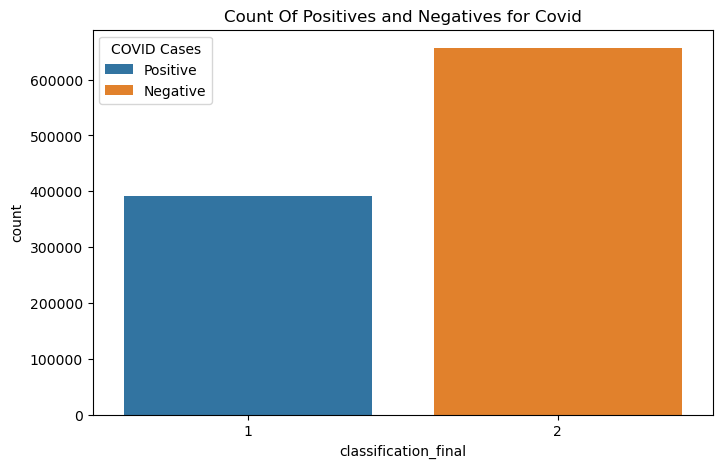

In [466]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'classification_final', data = covid, hue='classification_final', dodge=False)
#for bars in ax.containers:
#    ax.bar_label(bars)
plt.legend(title='COVID Cases', loc='upper left', labels=['Positive', 'Negative'])
plt.title("Count Of Positives and Negatives for Covid")
plt.show()

In [67]:
# Check Value Counts For classification_final In Percentage
covid['classification_final'].value_counts(normalize = True)

2    0.626179
1    0.373821
Name: classification_final, dtype: float64

In [250]:
# Create New Dataset With Positive Covid Only
pcovid = covid.loc[(covid.classification_final == 1)]

In [265]:
# Create A New Feature To Show If Patient Survived
pcovid.loc[pcovid['date_died'] == '9999-99-99', 'survived'] = 1
pcovid.loc[pcovid['date_died'] != '9999-99-99', 'survived'] = 2

In [266]:
# Check Head Again
pcovid.head(10)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,classification_final,died,hospitalized,survived,Age_class
0,2,1,1,1,03/05/2020,1,65,2,2,2,...,2,2,2,2,2,1,Yes,No,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,...,2,2,2,2,2,1,Yes,Yes,2,4
4,2,1,2,1,21/06/2020,2,68,2,1,2,...,2,2,2,2,2,1,Yes,No,2,5
5,2,1,1,2,9999-99-99,1,40,2,2,2,...,2,2,2,2,2,1,No,Yes,1,4
6,2,1,1,1,9999-99-99,2,64,2,2,2,...,2,2,2,2,2,1,No,No,1,5
7,2,1,1,1,9999-99-99,1,64,2,1,2,...,2,2,2,1,2,1,No,No,1,5
8,2,1,1,2,9999-99-99,2,37,2,1,2,...,2,2,1,2,2,1,No,Yes,1,4
9,2,1,1,2,9999-99-99,2,25,2,2,2,...,2,2,2,2,2,1,No,Yes,1,2
10,2,1,1,1,9999-99-99,2,38,2,2,2,...,2,2,2,2,2,1,No,No,1,4
11,2,1,2,2,9999-99-99,2,24,2,2,2,...,2,2,2,2,2,1,No,Yes,1,2


In [427]:
# Change Data Type To Int
pcovid[['survived']] = pcovid[['survived']].apply(pd.to_numeric)

/var/folders/jk/1cws__yn4bbfzktv83sdj85w0000gn/T/ipykernel_6440/1096778333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcovid[['survived']] = pcovid[['survived']].apply(pd.to_numeric)


In [429]:
# Check Data Types Again
pcovid.dtypes

usmer                    int64
medical_unit             int64
sex                      int64
patient_type             int64
date_died               object
pneumonia                int64
age                      int64
pregnant                 int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hipertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
classification_final     int64
died                    object
hospitalized            object
survived                 int64
Age_class                int64
dtype: object

In [267]:
# Make It Easier To Read If Patient Was Hospitalized Or Not, As It Is A Bit Confusing Right Now
pcovid.loc[pcovid['patient_type'] == 2, 'hospitalized'] = "Yes"
pcovid.loc[pcovid['patient_type'] == 1, 'hospitalized'] = "No"

In [268]:
# Check Head Again
pcovid.head(10)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,classification_final,died,hospitalized,survived,Age_class
0,2,1,1,1,03/05/2020,1,65,2,2,2,...,2,2,2,2,2,1,Yes,No,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,...,2,2,2,2,2,1,Yes,Yes,2,4
4,2,1,2,1,21/06/2020,2,68,2,1,2,...,2,2,2,2,2,1,Yes,No,2,5
5,2,1,1,2,9999-99-99,1,40,2,2,2,...,2,2,2,2,2,1,No,Yes,1,4
6,2,1,1,1,9999-99-99,2,64,2,2,2,...,2,2,2,2,2,1,No,No,1,5
7,2,1,1,1,9999-99-99,1,64,2,1,2,...,2,2,2,1,2,1,No,No,1,5
8,2,1,1,2,9999-99-99,2,37,2,1,2,...,2,2,1,2,2,1,No,Yes,1,4
9,2,1,1,2,9999-99-99,2,25,2,2,2,...,2,2,2,2,2,1,No,Yes,1,2
10,2,1,1,1,9999-99-99,2,38,2,2,2,...,2,2,2,2,2,1,No,No,1,4
11,2,1,2,2,9999-99-99,2,24,2,2,2,...,2,2,2,2,2,1,No,Yes,1,2


Text(0.5, 1.0, 'Correlation Between Features')

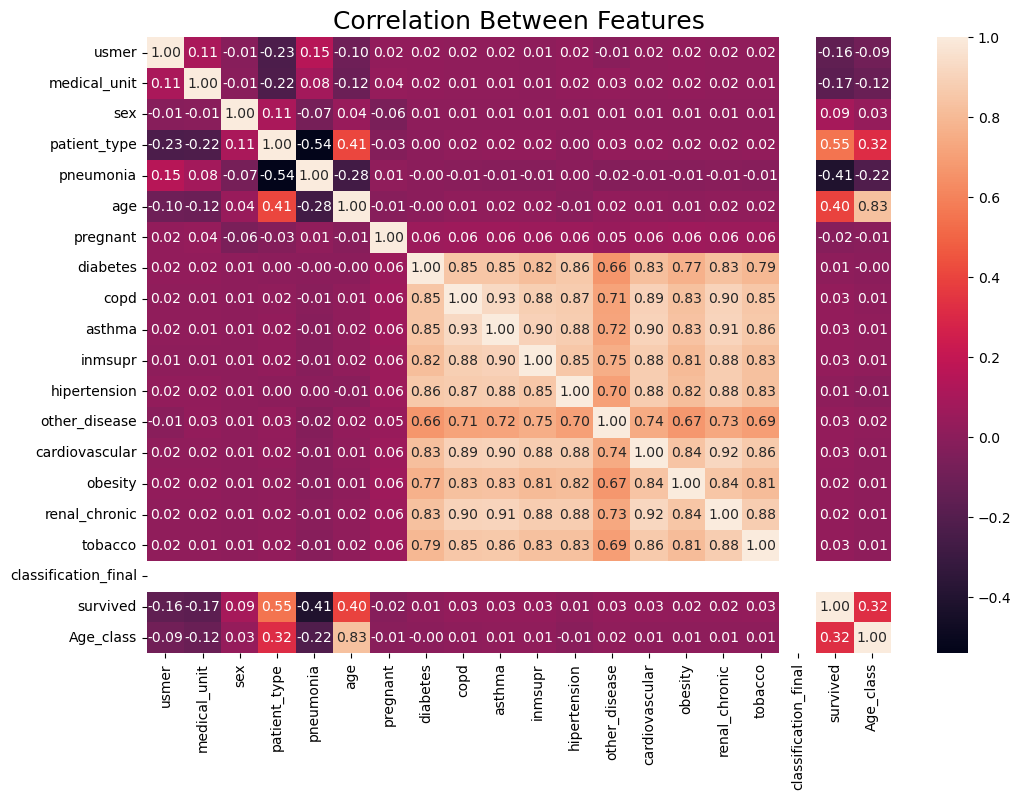

In [432]:
# Correlation Between Features
plt.figure(figsize=(12,8))
sns.heatmap(pcovid.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)

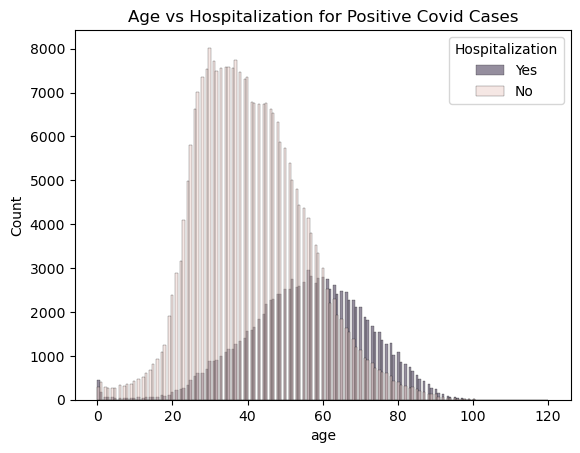

In [446]:
# Plot Graph Of Age vs Hospitalization
patient_type = sns.histplot(x='age', data = pcovid,  hue = 'patient_type') 
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.title("Age vs Hospitalization for Positive Covid Cases")
plt.show(patient_type)

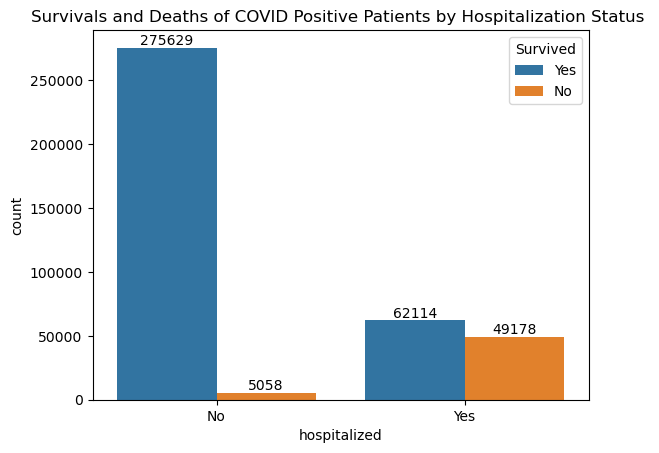

In [465]:
# Plot Graph Of Count Of Survivals And Deaths For Hospitalized Patients

hospitalized = sns.countplot(x = 'hospitalized', data=pcovid, hue='survived') 
for bars in hospitalized.containers:
    hospitalized.bar_label(bars)
plt.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])
plt.title("Survivals and Deaths of COVID Positive Patients by Hospitalization Status ")
plt.show(hospitalized)

In [290]:
# Create New Dataset For Positive Covid Patients Hospitalized
pcovid_hospitalized = pcovid.loc[(pcovid.patient_type == 2)]

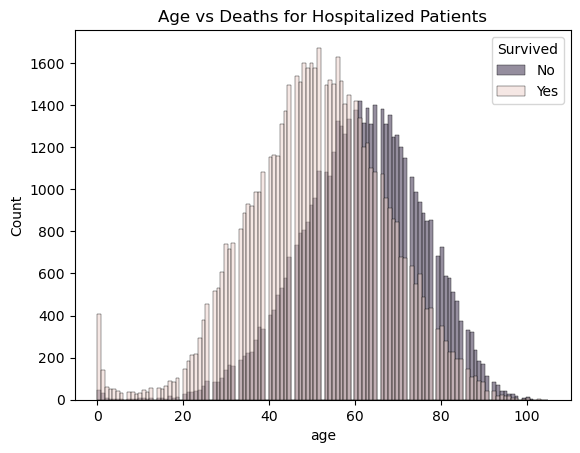

In [419]:
# Plot Graph Of Age vs Deaths for Hospitalized Patients
survived = sns.histplot(x='age', data = pcovid_hospitalized,  hue = 'survived') 
plt.title("Age vs Deaths for Hospitalized Patients")
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show(survived)

In [411]:
# Create New Feature According To Age
pcovid_hospitalized.loc[pcovid_hospitalized['age'] < 16, 'age_group'] = 1
pcovid_hospitalized.loc[(pcovid_hospitalized['age'] >= 16) & (pcovid_hospitalized['age'] < 40), 'age_group'] = 2
pcovid_hospitalized.loc[(pcovid_hospitalized['age'] >= 40) & (pcovid_hospitalized['age'] < 60), 'age_group'] = 3
pcovid_hospitalized.loc[(pcovid_hospitalized['age'] >= 60) & (pcovid_hospitalized['age'] < 90), 'age_group'] = 4
pcovid_hospitalized.loc[pcovid_hospitalized['age'] >= 90, 'age_group'] = 5

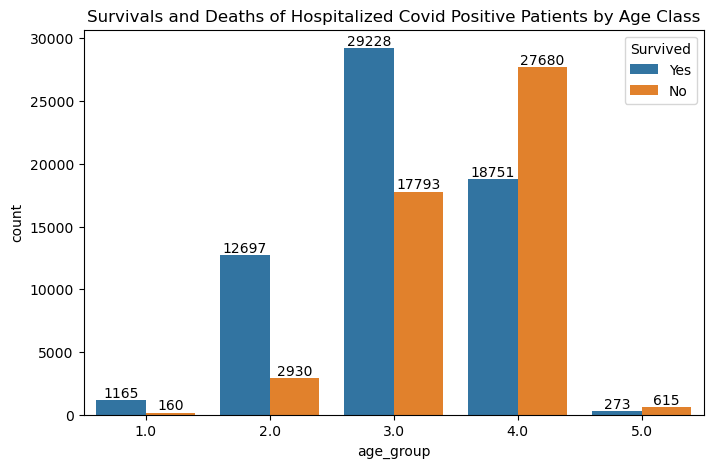

In [417]:
# Plot Graph of Survivals and Deaths of Hospitalized Covid Positive Patients by Age Class
plt.figure(figsize = (8,5))
ac = sns.countplot(x = 'age_group', data = pcovid_hospitalized, hue = 'survived')
for bars in ac.containers:
    ac.bar_label(bars)
plt.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])
plt.title("Survivals and Deaths of Hospitalized Covid Positive Patients by Age Class")
plt.show()

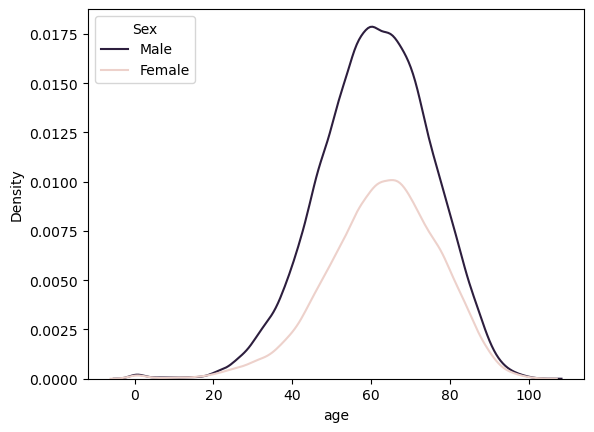

In [418]:
# Plot Graph of Deaths by Gender

hospitalized_and_death = pcovid.loc[(pcovid.patient_type == 2) & (pcovid.date_died != '9999-99-99')]

g = sns.kdeplot (x='age', data=hospitalized_and_death, hue='sex')
plt.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])
plt.show(g)

# Hypothesis Analysis

Null Hypothesis (H0): There is no difference in the survival rate between age group 4 (60 - 90 years old) and group 5 (older than 90).

Alternative Hypothesis (HA): There is a difference in the survival rate between age group 4 (60 - 90 years old) and group 5 (older than 90).

In [433]:
pcovid_hospitalized_young = pcovid_hospitalized[pcovid_hospitalized['age_group'] == 4]
pcovid_hospitalized_old = pcovid_hospitalized[pcovid_hospitalized['age_group'] == 5]

In [434]:
a = pcovid_hospitalized_young['survived']

In [435]:
b = pcovid_hospitalized_old['survived']

In [436]:
alpha = 0.05

In [437]:
t, p = stats.ttest_ind(a, b)

In [438]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [439]:
print("t = " + str(t))
print("p = " + str(p))
print_sig(p, alpha)

t = -5.806423576541534
p = 6.422823625000484e-09
We reject our null hypothesis.
